In [1]:
import numpy as np
import os
import cv2
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Conv2D
from keras._tf_keras.keras.layers import MaxPooling2D
from keras._tf_keras.keras.layers import Flatten
from keras._tf_keras.keras.layers import Dense
from keras._tf_keras.keras.layers import Dropout
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.preprocessing import image
from keras._tf_keras.keras.models import load_model

import matplotlib.pyplot as plt
from matplotlib import pylab

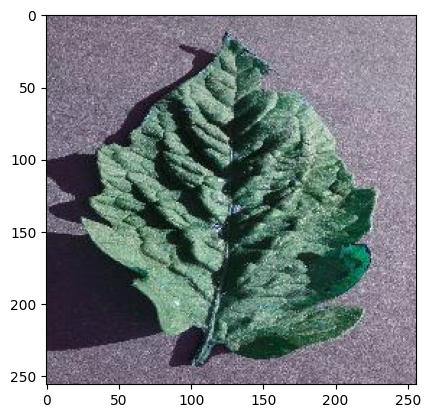

In [2]:
imagem = cv2.imread('dataset/test/mancha_alvo/0c2bd887-092f-410d-ac56-9b96110665c8___Com.G_TgS_FL 8285.JPG')
plt.imshow(imagem)

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [4]:
conjunto_treino = train.flow_from_directory('dataset/test', target_size=(256,256), batch_size=32, class_mode='categorical')
conjunto_teste = test.flow_from_directory('dataset/train', target_size=(256,256), batch_size=32, class_mode='categorical')

Found 1000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [5]:
labels = [k for k in conjunto_treino.class_indices]

In [6]:
amostra_de_treino = conjunto_treino.__next__()

In [7]:
images = amostra_de_treino[0]
nomes = amostra_de_treino[1]

In [8]:
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

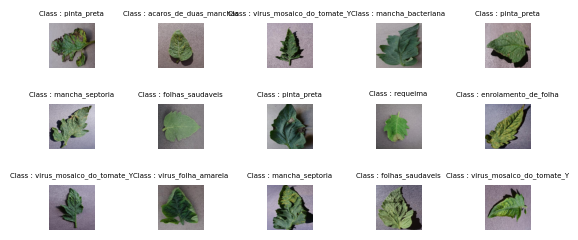

In [9]:
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.subplots_adjust(hspace=0.8, wspace=0.8)
  plt.imshow(images[i])
  plt.title(f'Class : {labels[np.argmax(nomes[i],axis=0)]}',fontsize=5)
  plt.axis('off')

In [10]:
cnn = Sequential()
cnn

<Sequential name=sequential, built=False>

In [11]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=[256,256,3], name="Camada_Covolucional_1"))

c:\Users\drago\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid', name="Camada_MaxPooling_1"))

In [15]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name="Camada_Covolucional_22"))

In [16]:
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid', name="Camada_MaxPooling_2"))

In [17]:
cnn.add(Flatten(name='Camada_Flatterning'))

In [18]:
cnn.add(Dense(units=1024, activation='relu', name='Camada_FullConnect'))

In [19]:
cnn.add(Dropout(0.5, name='Camada_de_Dropout'))

In [20]:
cnn.add(Dense(units=10, activation='softmax', name='Camada_de_Saida_1'))

In [22]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Camada_Covolucional_1 (Conv2D)  │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_MaxPooling_1             │ (None, 127, 127, 32)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_Covolucional_2 (Conv2D)  │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_Covolucional_22 (Conv2D) │ (None, 123, 123, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_MaxPooling_2             │ (None, 61, 61, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_Flatterning (Flatten)    │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_FullConnect (Dense)      │ (None, 1024)           │   243,860,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_de_Dropout (Dropout)     │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Camada_de_Saida_1 (Dense)       │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,899,370 (930.40 MB)

 Trainable params: 243,899,370 (930.40 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
cnn.fit(x=conjunto_treino, epochs=5, validation_data=conjunto_teste)

Epoch 1/5


c:\Users\drago\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 552s 16s/step - accuracy: 0.0935 - loss: 0.7991 - val_accuracy: 0.1746 - val_loss: 0.2930
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.3335 - loss: 0.2853 - val_accuracy: 0.5828 - val_loss: 0.2056
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.6551 - loss: 0.1943 - val_accuracy: 0.6260 - val_loss: 0.1791
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.7688 - loss: 0.1291 - val_accuracy: 0.6897 - val_loss: 0.1579
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 4s/step - accuracy: 0.8775 - loss: 0.0832 - val_accuracy: 0.6690 - val_loss: 0.1816


In [25]:
resposta = cnn.predict(conjunto_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 193ms/step


In [26]:
cnn.evaluate(conjunto_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 61s 193ms/step - accuracy: 0.6719 - loss: 0.1808


[0.18164171278476715, 0.6690000295639038]

In [27]:
conjunto_teste[0][0][0].shape

(256, 256, 3)

In [99]:
conjunto_teste.class_indices

{'acaros_de_duas_manchas': 0,
 'enrolamento_de_folha': 1,
 'folhas_saudaveis': 2,
 'mancha_alvo': 3,
 'mancha_bacteriana': 4,
 'mancha_septoria': 5,
 'pinta_preta': 6,
 'requeima': 7,
 'virus_folha_amarela': 8,
 'virus_mosaico_do_tomate_Y': 9}

In [125]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array /= 255.0

    prediction = cnn.predict(img_array)
    prediction_class = np.argmax(prediction, axis=1)[0]
    
    for key, value in conjunto_teste.class_indices.items():
        if value == prediction_class:
            if int(value) == 0:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            if value == 1:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            if value == 2:
                return f"A imagem apresenta uma folha saudável!"
            if value == 3:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            if value == 4:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            if value == 5:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            if value == 6:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            if value == 7:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            if value == 8:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            if value == 9:
                return f"A imagem apresenta a doença {key.replace("_"," ").capitalize()}!"
            

In [124]:
predict_image('dataset/test/pinta_preta/0abc57ec-7f3b-482a-8579-21f3b2fb780b___RS_Erly.B 7609.JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


'A imagem apresenta a doença Pinta preta !'